# **QSAR Model Building of Acetylcholinesterase Inhibitors**

Chanin Nantasenamat

*Data Professor YouTube channel, http://youtube.com/dataprofessor*

# Read in data

In [2]:
import pandas as pd

In [3]:
dataset_url = '/Users/hugo/Desktop/bioactivity-prediction-app/ADAMTS4_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
dataset = pd.read_csv(dataset_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.696804
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.744727
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.795880
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.886057
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.954677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.200659
595,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.397940
596,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.096910
597,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.522879


In [4]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
595,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
596,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
597,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y = dataset.iloc[:,-1]
Y

0      4.696804
1      5.744727
2      5.795880
3      5.886057
4      4.954677
         ...   
594    7.200659
595    7.397940
596    8.096910
597    7.522879
598    8.698970
Name: pIC50, Length: 599, dtype: float64

# Remove low variance features

In [6]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,PubchemFP33,PubchemFP34,PubchemFP37,PubchemFP115,...,PubchemFP777,PubchemFP778,PubchemFP785,PubchemFP798,PubchemFP800,PubchemFP801,PubchemFP813,PubchemFP819,PubchemFP821,PubchemFP826
0,0,0,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,1,1,0,0,1,1,1,0,...,0,0,1,1,0,0,0,0,0,0
2,1,0,1,1,0,0,1,1,1,0,...,0,0,1,1,0,0,0,0,0,0
3,0,0,1,1,0,0,1,1,1,0,...,0,0,1,1,0,0,0,0,0,0
4,0,0,1,1,0,0,1,1,1,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,1,1,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
595,1,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,1,1,1,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
597,1,1,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [7]:
X.to_csv('descriptor_list.csv', index = False)

In [8]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8712780166560198

## Model Prediction

In [11]:
Y_pred = model.predict(X)
Y_pred

array([4.77337646, 5.75369108, 5.80216959, 5.76841254, 5.02098785,
       5.74397832, 5.83733683, 5.6377503 , 5.49819292, 5.03462784,
       4.27840029, 4.24171893, 4.43293122, 4.41152822, 4.22244936,
       4.65916366, 4.23500139, 4.26907194, 4.23250603, 5.05975753,
       5.05250987, 4.88315588, 4.88315588, 5.28945879, 5.3607109 ,
       5.35444121, 5.48492126, 4.91136748, 4.79055971, 5.35444121,
       5.02992767, 5.27558382, 4.78211564, 5.62406465, 5.6325774 ,
       4.823544  , 5.35178465, 5.16571581, 4.98543357, 5.69517163,
       5.42909805, 5.49232345, 4.98543357, 5.09668813, 5.13729411,
       5.37600568, 5.33954213, 5.11904594, 5.10388075, 5.07491695,
       5.02036822, 4.9689913 , 5.24138683, 5.25900432, 5.34404626,
       5.12396604, 4.77954246, 5.93099571, 5.72091137, 5.13574568,
       5.93850629, 5.82852511, 5.17609647, 5.91739979, 5.93726792,
       5.51913916, 5.57836637, 5.53650638, 4.93212585, 5.75193912,
       5.77701122, 5.9906448 , 5.15495739, 5.62298129, 5.45517

## Model Performance

In [12]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.15
Coefficient of determination (R^2): 0.87


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [13]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

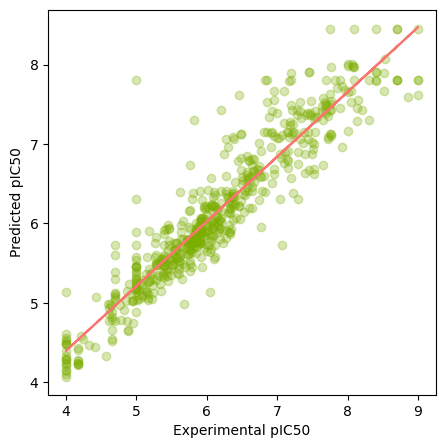

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [15]:
import pickle

In [17]:
pickle.dump(model, open('ADAMTS4_model.pkl', 'wb'))